In [30]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [3]:
meta_df = pd.read_csv('/home/naoya.taguchi/.kaggle/competitions/PLAsTiCC-2018/test_set_metadata.csv')
meta_df

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv
0,13,34.453125,-5.229529,169.987075,-59.956185,1,0.3048,0.3193,0.0542,41.1123,0.019
1,14,33.398438,-4.331149,167.226341,-59.936551,1,NaN,0.6323,0.0179,42.8774,0.018
2,17,348.529419,-61.755440,321.293980,-51.763351,1,NaN,0.8297,0.0605,43.6000,0.016
3,23,34.804688,-5.829153,171.307861,-60.174401,1,NaN,0.6533,0.1479,42.9640,0.023
4,34,351.321442,-64.198746,317.458993,-50.429931,1,0.4557,0.4617,0.0122,42.0540,0.023
5,35,35.332031,-5.979157,172.286722,-59.931743,1,NaN,0.8388,0.0375,43.6290,0.022
6,43,0.574468,-45.981140,327.041068,-68.778764,1,NaN,0.6669,0.0546,43.0186,0.006
7,50,0.574468,-45.981140,327.041068,-68.778764,1,NaN,1.4663,0.0529,45.1281,0.006
8,60,346.562500,-63.448284,320.824720,-49.866957,1,NaN,0.9462,0.0116,43.9519,0.021
9,69,349.160583,-64.760857,318.219706,-49.458924,1,NaN,1.0432,0.1092,44.2138,0.020


In [66]:
df = pd.read_csv('../submissions/Booster_weight-multi-logloss-0.507224_2018-12-12-17-15-09.csv')

### 一旦 class 99 を落とす

In [67]:
df.drop('class_99', axis=1, inplace=True)

### ie eg zero padding 

In [68]:
df.loc[df[meta_df.distmod.isnull()].index, ['class_15', 'class_42', 'class_52', 'class_62', 'class_64', 'class_67', 'class_88', 'class_90', 'class_95']] = 0.
df.loc[df[meta_df.distmod.notnull()].index, ['class_6', 'class_16', 'class_53', 'class_65', 'class_92']] = 0.
df

,object_id,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95
0,13,0.000000,0.050991,0.000000,0.206966,0.170337,0.000000,0.063914,0.045488,0.000000,0.047397,0.045567,0.096578,0.000000,0.045827
1,14,0.000000,0.107258,0.000000,0.132967,0.083563,0.000000,0.081044,0.048287,0.000000,0.061469,0.049440,0.128110,0.000000,0.067663
2,17,0.000000,0.085691,0.000000,0.082207,0.071761,0.000000,0.065869,0.084869,0.000000,0.070020,0.049336,0.175853,0.000000,0.079162
3,23,0.000000,0.050742,0.000000,0.083124,0.062416,0.000000,0.074327,0.053554,0.000000,0.170673,0.046587,0.155601,0.000000,0.071627
4,34,0.000000,0.047520,0.000000,0.064095,0.079277,0.000000,0.051999,0.044649,0.000000,0.058946,0.044714,0.337977,0.000000,0.046170
5,35,0.000000,0.049480,0.000000,0.072791,0.064058,0.000000,0.056907,0.046346,0.000000,0.087860,0.045874,0.180757,0.000000,0.166950
6,43,0.000000,0.053623,0.000000,0.082812,0.068071,0.000000,0.071482,0.064242,0.000000,0.130134,0.048696,0.173497,0.000000,0.070087
7,50,0.000000,0.056197,0.000000,0.062763,0.064782,0.000000,0.060391,0.204382,0.000000,0.098376,0.043403,0.103379,0.000000,0.087174
8,60,0.000000,0.048725,0.000000,0.069169,0.057656,0.000000,0.060359,0.044674,0.000000,0.117478,0.045234,0.194662,0.000000,0.136715
9,69,0.000000,0.049501,0.000000,0.078157,0.062844,0.000000,0.075386,0.045673,0.000000,0.097357,0.046578,0.119653,0.000000,0.196454


In [69]:
classes = ['class_6', 'class_15', 'class_16', 'class_42', 'class_52', 'class_53', 'class_62', 'class_64', 'class_65', 'class_67', 'class_88', 'class_90', 'class_92', 'class_95']
sum_row =  df[classes].sum(axis=1)

for _class in classes:
    df[_class] = df[_class] / sum_row
df[classes].sum(axis=1)

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
7          1.0
8          1.0
9          1.0
10         1.0
11         1.0
12         1.0
13         1.0
14         1.0
15         1.0
16         1.0
17         1.0
18         1.0
19         1.0
20         1.0
21         1.0
22         1.0
23         1.0
24         1.0
25         1.0
26         1.0
27         1.0
28         1.0
29         1.0
          ... 
3492860    1.0
3492861    1.0
3492862    1.0
3492863    1.0
3492864    1.0
3492865    1.0
3492866    1.0
3492867    1.0
3492868    1.0
3492869    1.0
3492870    1.0
3492871    1.0
3492872    1.0
3492873    1.0
3492874    1.0
3492875    1.0
3492876    1.0
3492877    1.0
3492878    1.0
3492879    1.0
3492880    1.0
3492881    1.0
3492882    1.0
3492883    1.0
3492884    1.0
3492885    1.0
3492886    1.0
3492887    1.0
3492888    1.0
3492889    1.0
Length: 3492890, dtype: float64

### harada san post processing

In [70]:
post_df = df.set_index('object_id')

In [71]:
preds = post_df.values
#y_true = np.concatenate(y_true)
weight = np.array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])
weight = weight / preds.sum(axis=0)

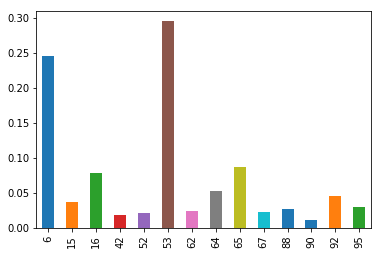

In [41]:
b = pd.Series(weight/np.sum(weight))
b.index = [6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]
b.plot('bar')

In [72]:
classes = ['class_6', 'class_15', 'class_16', 'class_42', 'class_52', 'class_53', 'class_62', 'class_64', 'class_65', 'class_67', 'class_88', 'class_90', 'class_92', 'class_95']
post_df[classes] = preds * weight

sum_row =  post_df[classes].sum(axis=1)

for _class in classes:
    post_df[_class] = post_df[_class] / sum_row
print(post_df[classes].sum(axis=1))

post_df

object_id
13           1.0
14           1.0
17           1.0
23           1.0
34           1.0
35           1.0
43           1.0
50           1.0
60           1.0
69           1.0
88           1.0
96           1.0
106          1.0
114          1.0
115          1.0
116          1.0
130          1.0
142          1.0
147          1.0
151          1.0
168          1.0
171          1.0
173          1.0
176          1.0
184          1.0
186          1.0
195          1.0
198          1.0
204          1.0
211          1.0
            ... 
130787078    1.0
130787121    1.0
130787259    1.0
130787288    1.0
130787315    1.0
130787346    1.0
130787409    1.0
130787413    1.0
130787553    1.0
130787572    1.0
130787650    1.0
130787683    1.0
130787746    1.0
130787754    1.0
130787792    1.0
130787808    1.0
130787817    1.0
130787819    1.0
130787871    1.0
130787879    1.0
130787887    1.0
130787903    1.0
130787932    1.0
130787944    1.0
130787965    1.0
130787966    1.0
130787971    1.0
1307

,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95
object_id,,,,,,,,,,,,,,
13,0.000000,0.104735,0.000000,0.211219,0.200718,0.000000,0.083482,0.132346,0.000000,0.058317,0.069119,0.063769,0.000000,0.076296
14,0.000000,0.210079,0.000000,0.129401,0.093896,0.000000,0.100943,0.133966,0.000000,0.072120,0.071511,0.080663,0.000000,0.107421
17,0.000000,0.162023,0.000000,0.077230,0.077841,0.000000,0.079199,0.227301,0.000000,0.079307,0.068889,0.106887,0.000000,0.121322
23,0.000000,0.102365,0.000000,0.083320,0.072237,0.000000,0.095352,0.153034,0.000000,0.206253,0.069405,0.100909,0.000000,0.117125
34,0.000000,0.109101,0.000000,0.073116,0.104419,0.000000,0.075918,0.145202,0.000000,0.081068,0.075812,0.249443,0.000000,0.085920
35,0.000000,0.098142,0.000000,0.071736,0.072892,0.000000,0.071777,0.130209,0.000000,0.104390,0.067194,0.115253,0.000000,0.268407
43,0.000000,0.107943,0.000000,0.082827,0.078611,0.000000,0.091503,0.183176,0.000000,0.156921,0.072390,0.112271,0.000000,0.114357
50,0.000000,0.086814,0.000000,0.048174,0.057413,0.000000,0.059326,0.447227,0.000000,0.091036,0.049516,0.051338,0.000000,0.109156
60,0.000000,0.098433,0.000000,0.069429,0.066822,0.000000,0.077542,0.127837,0.000000,0.142166,0.067484,0.126418,0.000000,0.223868


### predict class_99

In [75]:
df = post_df.copy()

In [76]:
res = df[classes].values

preds_99 = np.ones((res.shape[0]))
for i in range(res.shape[1]):
    preds_99 *= (1 - res[:, i])
    
preds_99 = 0.14 * preds_99 / np.mean(preds_99)
preds_99

array([0.14669611, 0.14787669, 0.14715236, ..., 0.13458447, 0.10231075,
       0.14266656])

In [77]:
df['class_99'] = preds_99

In [78]:
new_classes = ['class_6', 'class_15', 'class_16', 'class_42', 'class_52', 'class_53', 'class_62', 'class_64', 'class_65', 'class_67', 'class_88', 'class_90', 'class_92', 'class_95', 'class_99']
sum_row =  df[new_classes].sum(axis=1)

for _class in new_classes:
    df[_class] = df[_class] / sum_row
df[new_classes].sum(axis=1)

object_id
13           1.0
14           1.0
17           1.0
23           1.0
34           1.0
35           1.0
43           1.0
50           1.0
60           1.0
69           1.0
88           1.0
96           1.0
106          1.0
114          1.0
115          1.0
116          1.0
130          1.0
142          1.0
147          1.0
151          1.0
168          1.0
171          1.0
173          1.0
176          1.0
184          1.0
186          1.0
195          1.0
198          1.0
204          1.0
211          1.0
            ... 
130787078    1.0
130787121    1.0
130787259    1.0
130787288    1.0
130787315    1.0
130787346    1.0
130787409    1.0
130787413    1.0
130787553    1.0
130787572    1.0
130787650    1.0
130787683    1.0
130787746    1.0
130787754    1.0
130787792    1.0
130787808    1.0
130787817    1.0
130787819    1.0
130787871    1.0
130787879    1.0
130787887    1.0
130787903    1.0
130787932    1.0
130787944    1.0
130787965    1.0
130787966    1.0
130787971    1.0
1307

In [81]:
df

,class_6,class_15,class_16,class_42,class_52,class_53,class_62,class_64,class_65,class_67,class_88,class_90,class_92,class_95,class_99
object_id,,,,,,,,,,,,,,,
13,0.000000,0.091336,0.000000,0.184198,0.175040,0.000000,0.072802,0.115415,0.000000,0.050857,0.060276,0.055611,0.000000,0.066535,0.127929
14,0.000000,0.183016,0.000000,0.112730,0.081800,0.000000,0.087939,0.116707,0.000000,0.062829,0.062298,0.070271,0.000000,0.093582,0.128826
17,0.000000,0.141239,0.000000,0.067323,0.067856,0.000000,0.069040,0.198144,0.000000,0.069134,0.060052,0.093176,0.000000,0.105759,0.128276
23,0.000000,0.089179,0.000000,0.072587,0.062932,0.000000,0.083069,0.133321,0.000000,0.179684,0.060465,0.087911,0.000000,0.102037,0.128814
34,0.000000,0.095140,0.000000,0.063760,0.091057,0.000000,0.066204,0.126622,0.000000,0.070695,0.066111,0.217524,0.000000,0.074925,0.127964
35,0.000000,0.085632,0.000000,0.062592,0.063600,0.000000,0.062628,0.113612,0.000000,0.091084,0.058629,0.100562,0.000000,0.234194,0.127466
43,0.000000,0.094003,0.000000,0.072131,0.068459,0.000000,0.079687,0.159521,0.000000,0.136656,0.063041,0.097772,0.000000,0.099589,0.129142
50,0.000000,0.076549,0.000000,0.042478,0.050624,0.000000,0.052311,0.394344,0.000000,0.080272,0.043661,0.045268,0.000000,0.096249,0.118245
60,0.000000,0.085797,0.000000,0.060516,0.058243,0.000000,0.067587,0.111426,0.000000,0.123915,0.058821,0.110189,0.000000,0.195129,0.128378


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67bc9d7ac8>,
      dtype=object)

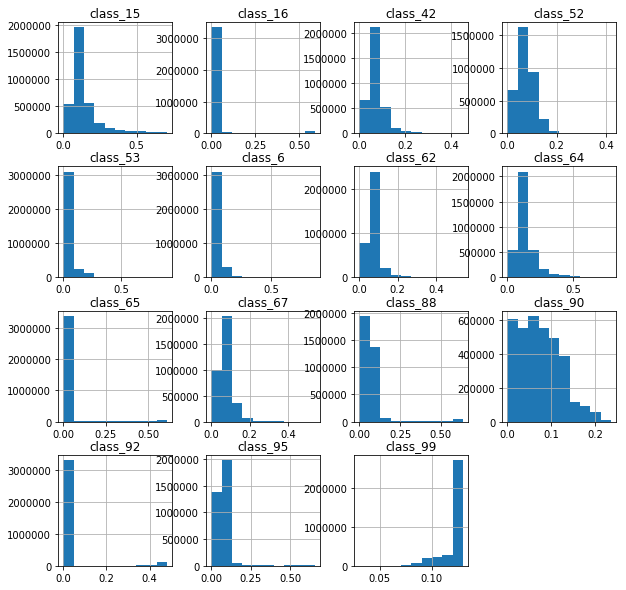

In [49]:
df.hist(figsize=(10, 10))

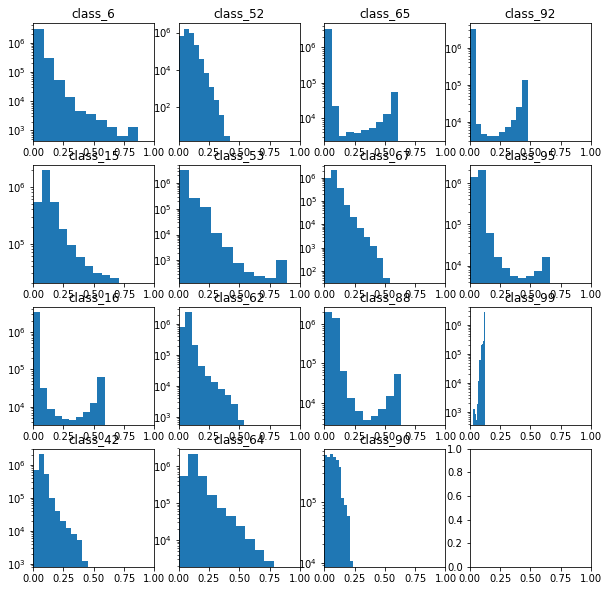

In [82]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i, col in enumerate(df.columns):
    ax = axs[i%4, i//4]
    ax.hist(df[col].values)
    ax.set_xlim((0, 1))
    ax.set_yscale('log')
    ax.set_title(str(col))

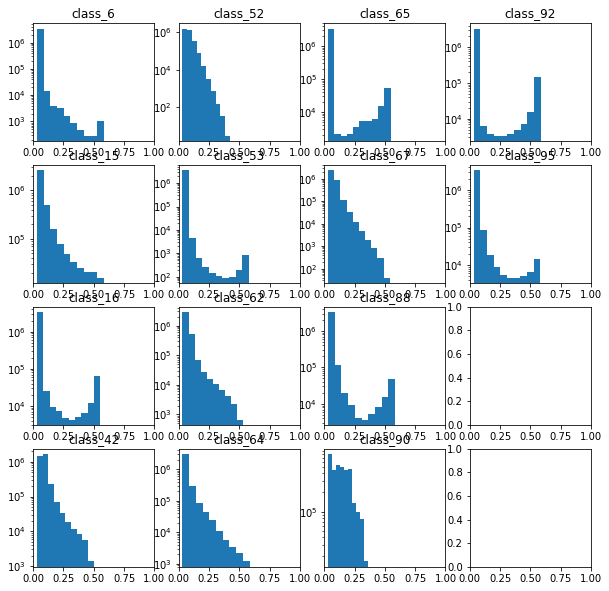

In [60]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
for i, col in enumerate(df.drop(['object_id', 'class_99'], axis=1).columns):
    ax = axs[i%4, i//4]
    ax.hist(df[col].values)
    ax.set_xlim((0, 1))
    ax.set_yscale('log')
    ax.set_title(str(col))

In [ ]:
df.to_csv('../submissions/_setzero.csv.gz', compression='gzip', index=False)